In [1]:
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.transforms import offset_copy
from matplotlib.offsetbox import AnchoredText

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.feature import NaturalEarthFeature
import cartopy.io.img_tiles as cimgt

In [2]:
"""To make map creation easier, the following dictionary contains the latitue and longitude coordinates for
creating maps focused on the Pacific, Indian, and Atlantic Oceans. The function ocean_map_boundary will convert the user chosen ocean_location into 
the map_extent (i.e. map_extent = ['x0', 'x1', 'y0', 'y1']) for the following functions. 

If the Southern or Northern oceans are required, an orthographic projection is recommened and functions for map
making of these oceans can be found further on. This is due to ease of visualisation, as the PlateCaree projection used 
for the other maps would cause too much distortion for the land masses around the poles.

If a more personalised map is desired, latitude and longitude specifications are required for the ocean_map_maker function
and a simple world map with gridlines can be found at the end of the notebook for easy latitude and longitude visualisation.

Personalised map_extent boundaries can be added to the dictionary ocean_location for easy storage and application."""

# specifying the map extent for a more personalised map, with the longitude points followed by the latitude points.
# map_extent = ['x0', 'x1', 'y0', 'y1'] 
# e.g. Australia map extent would be map_extent = [80, 170, -50, 15]

ocean_location = {
    'North Pacific' : {'lat_long' : [-120, 120, 75, 0]},
    'South Pacific' : {'lat_long' : [-60, 130, 0, -60]},
    'Central Pacific' : {'lat_long' : [120, -120, -60, 70]},

    'Indian' : {'lat_long' : [15, 135, -60, 30]},

    'North Atlantic' : {'lat_long' : [0, -90, 1, 75]},
    'South Atlantic' : {'lat_long' : [-75, 30, 15, -60]},
    'Central Atlantic' : {'lat_long' : [-90, 30, 70, -60]},

    'Oceania' : {'lat_long' : [80, 180, -50, 15]},
}


ocean_list = input('Ocean from List: ')


def ocean_map_boundary(x):

    if x in ocean_location :
        lat_long = (ocean_location[x]['lat_long'])
        print(lat_long)
        print('thank you, location selection complete')
        return (lat_long)
    else:
        print('please choose an option from the list')

ocean_map_boundary(ocean_list)

map_extent = (ocean_location[ocean_list]['lat_long'])

Ocean from List:  Indian


[15, 135, -60, 30]
thank you, location selection complete


In [3]:
"""The following function cheack_PlateCarree_projection is a quick test to make sure the projection specifications
for the ccrs.PlateCarree() command in ocean_map_maker is appropriate for the map_extent selected above.

The specifications need to be altered for mapping the Pacific region due to complications in reading the longitude 
extents for the generic ccrs.PlateCarree() command."""

def check_PlateCarree_projection() :
    if  'Pacific' in ocean_list :
        print('map should use (central_longitude=180) specification for the Pacific region')
    else: print('map using generic PlateCarree projection without specification')
check_PlateCarree_projection()

map using generic PlateCarree projection without specification


In [5]:
"""Map personalisation for marker location and name. 
Run this code and type in the latitude, longitude and name of the location of your interest The latitude and longitude
input variables need to be numbers and can be decimals, but anything else will come up with an error. 


The example below is the latitude and longitude marker for the Montebello Islands off the coast of Western Australia, 
a popular location for coral collection. 
To show the example marker in an appropriate map please choose the map_extent options: Central Pacific, Indian, or 
Oceania above.

    Input for Example:
    Latitude = -20.5167
    Longitude = 115.5333
    name = Montebello Islands

"""


LAT_marker = float(input('latitude of location: '))
LONG_marker = float(input('longitude of location: '))
location_name = input ('name of location: ')

def check_location_marker() :
    if LAT_marker <= -90.1 or LAT_marker >= 90.1 :
        print('please input proper latitude coordinate')
    else : print('successful latitude input :)')
        
    if LAT_marker <= -180.1 or LAT_marker >= 180.1 :
        print('please input proper longitude coordinate')
    else : print('successful longitude input :)')
        

check_location_marker()

latitude of location:  -20.5167
longitude of location:  115.5333
name of location:  Montebello Islands


successful latitude input :)
successful longitude input :)


<Figure size 432x288 with 0 Axes>

/opt/tljh/user/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/opt/tljh/user/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/opt/tljh/user/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_1_states_provinces_lines.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


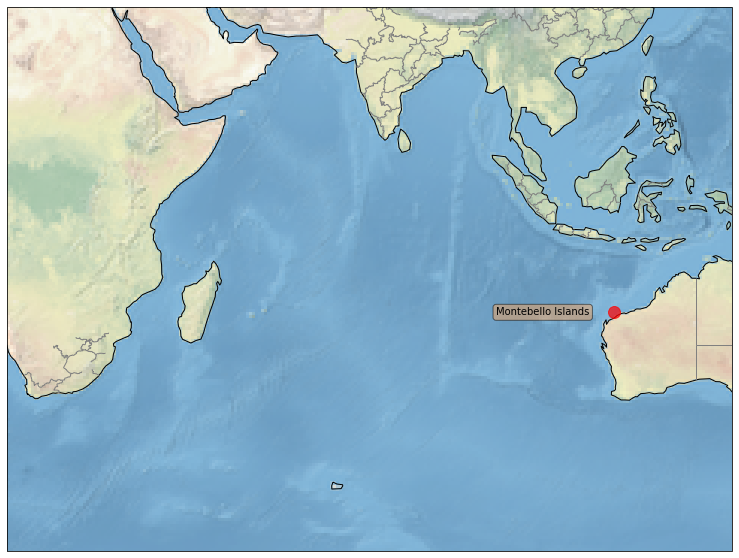

In [6]:
"""This map displays the wider area for the location of samples, centered around Oceans. Please run all the previous
code and complete the input parameters before running this cell. """



"""The following code sets the projection for the map based on whether you have chosen cooridnates focusing on the
Pacific Ocean or elsewhere."""


if 'Pacific' in ocean_list :
        projection_specify = ccrs.PlateCarree(central_longitude=180)
else: projection_specify = ccrs.PlateCarree()


"""The function ocean_map_maker makes the map based on the specifications you have chosen so far! Read through the
code and see where you can personalise the map even further."""
    
    
def ocean_map_maker():
  
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(1, 1, 1, projection=projection_specify)
    ax.set_extent(map_extent, crs=projection_specify)
    
    # Adds the marker and name of location
    ax.plot(LONG_marker, LAT_marker, marker='o', color='red', markersize=12,
        alpha=0.7, transform=ccrs.Geodetic())

    geodetic_transform = ccrs.Geodetic()._as_mpl_transform(ax)
    text_transform = offset_copy(geodetic_transform, units='dots', x=-25)
    
    ax.text(LONG_marker, LAT_marker, location_name,
            verticalalignment='center', horizontalalignment='right',
            transform=text_transform,
            bbox=dict(facecolor='sandybrown', alpha=0.5, boxstyle='round'))
        
    # Put a background image on for nice sea rendering.
    ax.stock_img()

    # Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
    states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

    # play around with the following features and see what you would like added to your map
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(states_provinces, edgecolor='gray')

    
"""The following code allows you to add in the appropriate source and licensing information to your maps. 
Currently it has the information for cartopy and its features. """
    
    
#     # Add a text annotation for the license information to the bottom right corner.
#     SOURCE = 'Natural Earth'
#     LICENSE = 'public domain'
#     text = AnchoredText('\u00A9 {}; license: {}'
#                         ''.format(SOURCE, LICENSE),
#                         loc=4, prop={'size': 12}, frameon=True)
#     ax.add_artist(text)

# save your work!
plt.savefig('ocean_maker.pdf')
plt.savefig('ocean_maker.png')

plt.show()

ocean_map_maker()

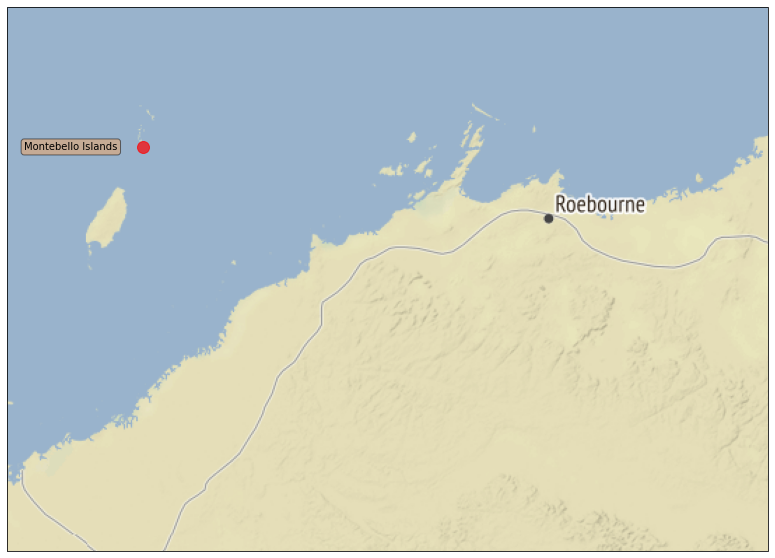

In [7]:
""" The focused_map function allows you to produce a map with a more zoomed in view of the location of your samples.
It is a bit more complex as it requires the specific latitude and longitude boundaries for the location, however, it 
follows the same pattern as the ocean_map_maker function above with the longitude points followed by the latitude points.
 e.g. ['x0', 'x1', 'y0', 'y1'] 
 
 The example given below is a focused map on the Montebello Islands, intended to accompany the previous map example. 
 
 These maps could be displayed in your presentation slides or on your scientist poster! 
 
 Note: This map utilises the Cartopy image tiles (cartopy.io.img_tiles) which enhance the map quality and allows further
 customisation however, can be a bit complex to implement. To read about tiles more visit: https://scitools.org.uk/cartopy/docs/v0.16/cartopy/io/img_tiles.html
 
 """

#map personalisation for the sample location, the following cooridinates are for the example 
sample_location = [115, 118, -20, -22]


def focused_map():
    # Create a Stamen terrain background instance.
    stamen_terrain = cimgt.Stamen('terrain')

    fig = plt.figure(figsize=(15, 10))

    # Create a GeoAxes in the tile's projection.
    ax = fig.add_subplot(1, 1, 1, projection=stamen_terrain.crs)

    # Limit the extent of the map to a small longitude/latitude range.
    ax.set_extent(sample_location, crs=ccrs.Geodetic())
    
    # Add the Stamen data at zoom level 8.
    ax.add_image(stamen_terrain, 8)
    
    # Adds the marker and name of location
    ax.plot(LONG_marker, LAT_marker, marker='o', color='red', markersize=12,
        alpha=0.7, transform=ccrs.Geodetic())

    # Use the cartopy interface to create a matplotlib transform object
    # for the Geodetic coordinate system. We will use this along with
    # matplotlib's offset_copy function to define a coordinate system which
    # translates the text by 25 pixels to the left.
    geodetic_transform = ccrs.Geodetic()._as_mpl_transform(ax)
    text_transform = offset_copy(geodetic_transform, units='dots', x=-25)

    # Add text 25 pixels to the left of the volcano.
    ax.text(LONG_marker, LAT_marker, location_name,
            verticalalignment='center', horizontalalignment='right',
            transform=text_transform,
            bbox=dict(facecolor='sandybrown', alpha=0.5, boxstyle='round'))

    # save your work!
    plt.savefig('focused_map.pdf')
    plt.savefig('focused_map.png')
    
    plt.show()

focused_map()

Southern Ocean or Arctic Ocean:  Southern Ocean


thank you, you have chosen the Southern Ocean


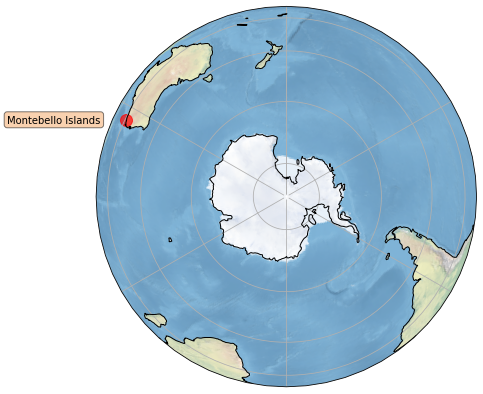

In [8]:
"""For the Southern Hemisphere (Southern Ocean) and Northern Hemisphere (Arctic Ocean) plotted on an 
orthographic projection for a more natural looking map option.

Run this code and choose between the Southern Ocean or Arctic Ocean to produce maps displaying these regions. 
Remember python is case sensitive, so no spelling mistakes. 

To continue with the Montebello Islands example please choose 'Southern Ocean' as the input option.

"""

poles = input('Southern Ocean or Arctic Ocean: ')

def orthographic_map():
    fig = plt.figure(figsize=[15, 10])
 
 # arctic_ocean = fig.add_subplot(1, 2, 1, projection=ccrs.Orthographic(0, 90))
#     southern_ocean = fig.add_subplot(1, 2, 2, projection=ccrs.Orthographic(180, -90))

    if poles == 'Southern Ocean' :
        chosen_ocean = fig.add_subplot(1, 2, 2, projection=ccrs.Orthographic(180, -90))
        print('thank you, you have chosen the Southern Ocean')
    elif poles == 'Arctic Ocean' :
        chosen_ocean = fig.add_subplot(1, 2, 1, projection=ccrs.Orthographic(0, 90))
        print('thank you, you have chosen the Arctic Ocean')
    else:
        print('please choose either Southern Ocean or Arctic Ocean (case sensitive)')

    ax = chosen_ocean
    ax.coastlines(zorder=3)
    ax.stock_img()
    ax.gridlines()

#     #map personalisation for marker location and name
#     LAT_maker = -20.5167
#     LONG_marker = 115.5333
#     location_name = 'Montebello Islands'
    
    # Adds the marker and name of location
    ax.plot(LONG_marker, LAT_marker, marker='o', color='red', markersize=12,
        alpha=0.7, transform=ccrs.Geodetic())
    geodetic_transform = ccrs.Geodetic()._as_mpl_transform(ax)
    text_transform = offset_copy(geodetic_transform, units='dots', x=-25)
    ax.text(LONG_marker, LAT_marker, location_name,
            verticalalignment='center', horizontalalignment='right',
            transform=text_transform,
            bbox=dict(facecolor='sandybrown', alpha=0.5, boxstyle='round'))

    # save your work!
    plt.savefig('orthographic_map.pdf')
    plt.savefig('orthographic_map.png')
    plt.show()
    
orthographic_map()

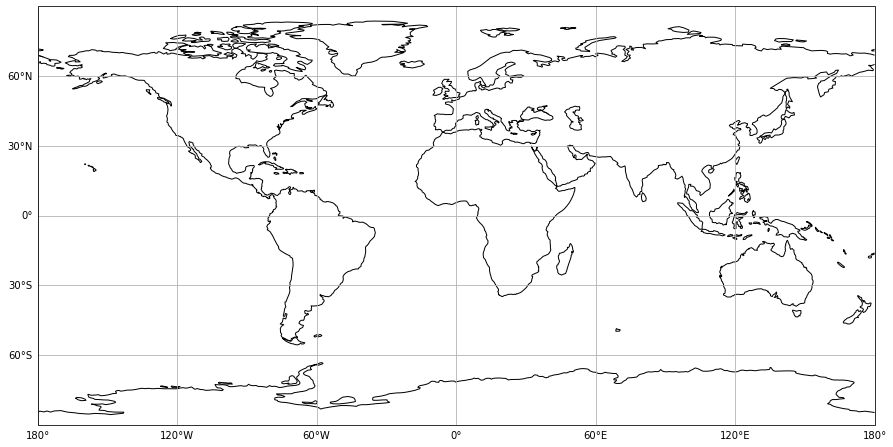

In [9]:
"""To aid in personalisation the following map is a simple flat global map with the latitude and longitude gridlines
displayed. This can be used to chose the coordinates for a location marker or for the map_extent boundaries."""

def worldmap_gridlines():

    plt.figure(figsize=(15, 10))
    ax2 = plt.axes(projection=ccrs.PlateCarree())
    ax2.coastlines(resolution='110m')
    gl = ax2.gridlines(draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False
    plt.show()


worldmap_gridlines()